In [2]:
from neural_network import *

from matplotlib import pyplot as plt

In [3]:
file_path = "../Data/01_Inicial_v8.xlsx"

D = Data_loader(file_path)

In [4]:
input_size1 = 5
output_size1 = 2
input_size2 = 3
output_size2 = 2

NN = Neural_network(input_size1,output_size1,input_size2,output_size2)

In [5]:
# Set hyperparameters
n_epochs1 = 300
batch_size1 = 80
n_epochs2 = 300
batch_size2 = 80
n_epochs3 = 300
batch_size3 = 80

lr1 = 1e-3
lr2 = 1e-3
lr3 = 1e-3

scheduler_step1 = 100
scheduler_gamma1 = 0.9

scheduler_step2 = 100
scheduler_gamma2 = 0.9

scheduler_step3 = 100
scheduler_gamma3 = 0.9

layers1 = [50 for _ in range(4)]
layers2 = [50 for _ in range(4)]

dropout1 = 0.2
dropout2 = 0.2

In [6]:
# Pre-train the first network
NN.init_net1(layers=layers1, dropout=dropout1)

loss1_train_pre = []
loss1_val_pre = []

opt1 = torch.optim.Adam(NN.net1.parameters(),lr=lr1)
sch1 = torch.optim.lr_scheduler.StepLR(opt1, step_size=scheduler_step1, gamma=scheduler_gamma1)

for epoch in range(n_epochs1):

  NN.net1.train()
  opt1.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  for X1, Y1_target in D.get_batch1(batch_size=batch_size1):
    Y1_pred = NN.net1(X1)
    loss = torch.nn.functional.mse_loss(Y1_target, Y1_pred, reduction='sum')
    loss.backward()
    opt1.step()

    loss_train_epoch += loss.item()

  NN.net1.eval()
  with torch.no_grad():
    for X1, Y1_target in D.get_batch1(batch_size=batch_size1,validation=True):
      Y1_pred = NN.net1(X1)
      loss = torch.nn.functional.mse_loss(Y1_target, Y1_pred, reduction='sum')

      loss_val_epoch += loss.item()

  loss_train_epoch = loss_train_epoch/(D.n_train*output_size1)
  loss_val_epoch = loss_val_epoch/(D.n_val*output_size1)

  loss1_train_pre.append(loss_train_epoch)
  loss1_val_pre.append(loss_val_epoch)

  sch1.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch}, Validation loss: {loss_val_epoch}')

Epoch: 0, Loss: 1.000517873835743, Validation loss: 0.8428570192251632
Epoch: 10, Loss: 0.28867085177199286, Validation loss: 0.12764069571423886
Epoch: 20, Loss: 0.1345603923152264, Validation loss: 0.038695050709283176
Epoch: 30, Loss: 0.12182758087502386, Validation loss: 0.031236264243054746
Epoch: 40, Loss: 0.09874969496762842, Validation loss: 0.017645273635636515
Epoch: 50, Loss: 0.0920373533005105, Validation loss: 0.015054218804658348
Epoch: 60, Loss: 0.07519916529045965, Validation loss: 0.011155351774016423
Epoch: 70, Loss: 0.09584383856981321, Validation loss: 0.014802075144070299
Epoch: 80, Loss: 0.08311284215826738, Validation loss: 0.021345572685127826
Epoch: 90, Loss: 0.08483953314616267, Validation loss: 0.0396188372996316
Epoch: 100, Loss: 0.06981065219506286, Validation loss: 0.009304672924440299
Epoch: 110, Loss: 0.0760474939991657, Validation loss: 0.012599961081547524
Epoch: 120, Loss: 0.06233347448191248, Validation loss: 0.01843062621444019
Epoch: 130, Loss: 0.0

In [7]:
# Train the second network
NN.init_net2(layers=layers2, dropout=dropout2)

loss1_train = []
loss1_val = []
loss2_train = []
loss2_val = []
loss_train = []
loss_val = []

opt2 = torch.optim.Adam(NN.net2.parameters(),lr=lr2)
sch2 = torch.optim.lr_scheduler.StepLR(opt2, step_size=scheduler_step2, gamma=scheduler_gamma2)

for epoch in range(n_epochs2):
  NN.train()
  opt2.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  loss1_train_epoch = 0
  loss1_val_epoch = 0

  loss2_train_epoch = 0
  loss2_val_epoch = 0

  for X, Y_target in D.get_batch2(batch_size=batch_size2):
    Y_pred = NN(X)
    loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
    loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
    loss = loss1 + loss2

    loss.backward()
    opt2.step()

    loss_train_epoch += loss.item()
    loss1_train_epoch += loss1.item()
    loss2_train_epoch += loss2.item()

  NN.eval()
  with torch.no_grad():
    for X, Y_target in D.get_batch2(batch_size=batch_size2,validation=True):
      Y_pred = NN(X)
      loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
      loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
      loss = loss1 + loss2

      loss_val_epoch += loss.item()
      loss1_val_epoch += loss1.item()
      loss2_val_epoch += loss2.item()

  loss1_train_epoch = loss1_train_epoch/(D.n_train2*output_size1)
  loss1_val_epoch = loss1_val_epoch/(D.n_val2*output_size1)
  loss2_train_epoch = loss2_train_epoch/(D.n_train2*output_size2)
  loss2_val_epoch = loss2_val_epoch/(D.n_val2*output_size2)
  loss_train_epoch = loss_train_epoch/(D.n_train2*(output_size1+output_size2))
  loss_val_epoch = loss_val_epoch/(D.n_val2*(output_size1+output_size2))

  loss1_train.append(loss1_train_epoch)
  loss1_val.append(loss1_val_epoch)
  loss2_train.append(loss2_train_epoch)
  loss2_val.append(loss2_val_epoch)
  loss_train.append(loss_train_epoch)
  loss_val.append(loss_val_epoch)

  sch2.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch} ({loss1_train_epoch} + {loss2_train_epoch}), Validation loss: {loss_val_epoch} ({loss1_val_epoch} + {loss2_val_epoch})')

Epoch: 0, Loss: 0.5293241341908773 (0.052147229512532554 + 1.0065010565298576), Validation loss: 0.4280220607541642 (0.011331567224466576 + 0.8447125272930793)
Epoch: 10, Loss: 0.3260981595074689 (0.052478025356928505 + 0.5997182881390607), Validation loss: 0.20689706982306713 (0.011331568349082515 + 0.4024625814185952)
Epoch: 20, Loss: 0.14051151275634766 (0.051024025237118756 + 0.22999899917178684), Validation loss: 0.05482795553387336 (0.011331568349082515 + 0.09832434384328015)
Epoch: 30, Loss: 0.1060466898812188 (0.05257220621462221 + 0.15952117796297427), Validation loss: 0.0430186964430899 (0.011331568349082515 + 0.07470582566171322)
Epoch: 40, Loss: 0.08930972991166292 (0.05376342822004248 + 0.12485603491465251), Validation loss: 0.03609113873175855 (0.011331568349082515 + 0.060850710239050525)
Epoch: 50, Loss: 0.08788358061401932 (0.05054214375990408 + 0.12522501857192428), Validation loss: 0.033039698060953394 (0.011331568349082515 + 0.05474782889744021)
Epoch: 60, Loss: 0.07

In [8]:
# Fine-tune both networks
opt3 = torch.optim.Adam(NN.parameters(),lr=lr3)
sch3 = torch.optim.lr_scheduler.StepLR(opt3, step_size=scheduler_step3, gamma=scheduler_gamma3)

for epoch in range(n_epochs3):
  NN.train()
  opt3.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  loss1_train_epoch = 0
  loss1_val_epoch = 0

  loss2_train_epoch = 0
  loss2_val_epoch = 0

  for X, Y_target in D.get_batch2(batch_size=batch_size3):
    Y_pred = NN(X)
    loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
    loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
    loss = loss1 + loss2

    loss.backward()
    opt3.step()

    loss_train_epoch += loss.item()
    loss1_train_epoch += loss1.item()
    loss2_train_epoch += loss2.item()

  NN.eval()
  with torch.no_grad():
    for X, Y_target in D.get_batch2(batch_size=batch_size3,validation=True):
      Y_pred = NN(X)
      loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
      loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
      loss = loss1 + loss2

      loss_val_epoch += loss.item()
      loss1_val_epoch += loss1.item()
      loss2_val_epoch += loss2.item()

  loss1_train_epoch = loss1_train_epoch/(D.n_train2*output_size1)
  loss1_val_epoch = loss1_val_epoch/(D.n_val2*output_size1)
  loss2_train_epoch = loss2_train_epoch/(D.n_train2*output_size2)
  loss2_val_epoch = loss2_val_epoch/(D.n_val2*output_size2)
  loss_train_epoch = loss_train_epoch/(D.n_train2*(output_size1+output_size2))
  loss_val_epoch = loss_val_epoch/(D.n_val2*(output_size1+output_size2))

  loss1_train.append(loss1_train_epoch)
  loss1_val.append(loss1_val_epoch)
  loss2_train.append(loss2_train_epoch)
  loss2_val.append(loss2_val_epoch)
  loss_train.append(loss_train_epoch)
  loss_val.append(loss_val_epoch)

  sch3.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch} ({loss1_train_epoch} + {loss2_train_epoch}), Validation loss: {loss_val_epoch} ({loss1_val_epoch} + {loss2_val_epoch})')

Epoch: 0, Loss: 0.0536538130707211 (0.04800144169065687 + 0.05930618445078532), Validation loss: 0.017052256836081452 (0.011588212454094077 + 0.022516300093452884)
Epoch: 10, Loss: 0.055286041012516725 (0.049863594549673575 + 0.06070848747535988), Validation loss: 0.036307739761640444 (0.011976874099587495 + 0.06063860767292527)
Epoch: 20, Loss: 0.06351111994849311 (0.06239322379783348 + 0.06462901499536303), Validation loss: 0.021295653199249844 (0.007567114425155352 + 0.0350241908487284)
Epoch: 30, Loss: 0.05106494161817762 (0.04327485517219261 + 0.058855025856583205), Validation loss: 0.021320423989925744 (0.013398109741930692 + 0.029242740487152676)
Epoch: 40, Loss: 0.046113424830966525 (0.04584156804614597 + 0.04638528161578708), Validation loss: 0.02253856748904822 (0.014817370558684727 + 0.030259766668643592)
Epoch: 50, Loss: 0.04765045642852783 (0.04920368724399143 + 0.04609722450927452), Validation loss: 0.023986501513787034 (0.00982345387620746 + 0.038149550275982554)
Epoch: 

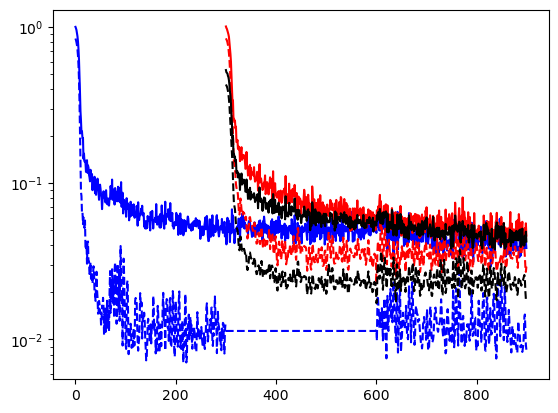

In [9]:
plt.figure()

epochs1 = range(len(loss1_train_pre))
epochs2 = range(len(loss1_train_pre),len(loss1_train_pre)+len(loss_train))

plt.plot(epochs1,loss1_train_pre,'b')
plt.plot(epochs1,loss1_val_pre,'b--')

plt.plot(epochs2,loss1_train,'b')
plt.plot(epochs2,loss1_val,'b--')

plt.plot(epochs2,loss2_train,'r')
plt.plot(epochs2,loss2_val,'r--')

plt.plot(epochs2,loss_train,'k')
plt.plot(epochs2,loss_val,'k--')

plt.yscale('log') 


In [10]:
NN.save('model.pt')